In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [12]:
col_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
df = pd.read_csv('pima_diabetes.csv', header = None, names = col_names)
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
feature_cols = ['pregnant','insulin','bmi','age','glucose','bp','pedigree']
x = df[feature_cols]
y = df.label

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)

In [16]:
clf = DecisionTreeClassifier()

In [17]:
clf = clf.fit(x_train,y_train)

In [18]:
y_pred = clf.predict(x_test)

In [19]:
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred))

Accuracy :  0.7402597402597403


#### Decision Tree Tuning Parameters

In [20]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred))

Accuracy :  0.7987012987012987


In [ ]:
feature_names = df.columns[:5]
target_names = df['label'].unique().tolist()

plot_tree(clf, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)

plt.savefig('tree_visualization.png') 

#### Mencoba dengan data lain

In [2]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.columns[:4]

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm'], dtype='object')

In [6]:
x = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = data.Species

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)

In [8]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)

In [9]:
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred))

Accuracy :  0.9666666666666667


In [10]:
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth=3)
dtc = dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred))

Accuracy :  0.9666666666666667


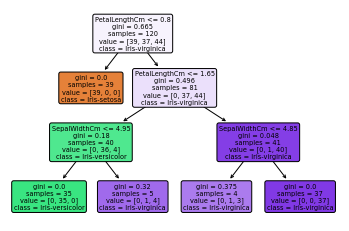

In [11]:
feature_names = data.columns[:4]
target_names = data['Species'].unique().tolist()

plot_tree(dtc, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)

plt.savefig('tree_visualization.png') 